In [62]:
import cv2
import numpy as np
import os

# Function to convert to gray level
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function for normalization
def normalize(image):
    return cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Function for rotate correction
def rotate_correction(image):
    # Placeholder for actual rotate correction logic
    # For now, assuming the image is not rotated
    return image

# Function to remove noise
def noise_removal(image):
    return cv2.medianBlur(image, 5)

# Load scanned document
image_path = '10.jpg'  # Update the path
image = cv2.imread(image_path)

# Apply preprocessing steps
gray_image = convert_to_gray(image)
normalized_image = normalize(gray_image)
corrected_image = rotate_correction(normalized_image)
denoised_image = noise_removal(corrected_image)

# Save preprocessed image
output_path = 'out.jpg'  # Update the path
cv2.imwrite(output_path, denoised_image)


True

In [63]:
# Predefine ROIs (x, y, width, height)
# These values are just examples and should be updated to match your document's layout
def select_roi(image):
    rois = cv2.selectROIs('Select ROI', image, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()
    return rois

# Load preprocessed image
preprocessed_image_path = 'out.jpg'  # Update the path
preprocessed_image = cv2.imread(preprocessed_image_path)
predefined_rois = [
    (40, 40, 200, 200),   # Logo
    (200, 650, 150, 150), # Stamp
    (670, 1150, 200, 70)   # Signature
]

for i, roi in enumerate(predefined_rois):
    x, y, w, h = roi
    cropped_image = preprocessed_image[y:y+h, x:x+w]
    output_path = f'out_{i}.jpg'  # Update the path
    cv2.imwrite(output_path, cropped_image)

In [64]:
def neural_network_extraction(image):
    # Placeholder for neural network application
    # For now, returning the image itself
    return image

# Function to select sub-band LL (assuming wavelet transform placeholder)
def select_sub_band_ll(image):
    # Placeholder for sub-band selection logic
    # For now, returning the image itself
    return image

# Placeholder for error value analysis
def error_value_analysis(image):
    # Placeholder for error value analysis
    # For now, returning the image itself
    return image

# Load segmented images
segmented_image_paths = ['path/to/save/roi_0.jpg', 'path/to/save/roi_1.jpg', 'path/to/save/roi_2.jpg']  # Update the paths
for path in segmented_image_paths:
    image = cv2.imread(path)
    nn_features = neural_network_extraction(image)
    sub_band_ll = select_sub_band_ll(nn_features)
    features = error_value_analysis(sub_band_ll)
    # Save or use the features

In [65]:
import os

train_dir = 'image'
val_dir = 'image'

print("Training dataset:")
for category in ['fake', 'real']:
    category_path = os.path.join(train_dir, category)
    print(f"\n{category_path}:")
    print(os.listdir(category_path))

print("\nValidation dataset:")
for category in ['fake', 'real']:
    category_path = os.path.join(val_dir, category)
    print(f"\n{category_path}:")
    print(os.listdir(category_path))


Training dataset:

image\fake:
['10.jpg', '12.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg']

image\real:
['10.jpeg', '11.jpeg', '12.jpg', '2.jpeg', '3.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']

Validation dataset:

image\fake:
['10.jpg', '12.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg']

image\real:
['10.jpeg', '11.jpeg', '12.jpg', '2.jpeg', '3.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']


In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os


# Set paths to your dataset
train_dir = 'image'
val_dir = 'image'

# Verify the directory structure
print("Training dataset:")
for category in ['fake', 'real']:
    category_path = os.path.join(train_dir, category)
    print(f"\n{category_path}:")
    print(os.listdir(category_path))

print("\nValidation dataset:")
for category in ['fake', 'real']:
    category_path = os.path.join(val_dir, category)
    print(f"\n{category_path}:")
    print(os.listdir(category_path))

# Image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Design the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# Save the model
model.save('model.h5')


Training dataset:

image\fake:
['10.jpg', '12.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg']

image\real:
['10.jpeg', '11.jpeg', '12.jpg', '2.jpeg', '3.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']

Validation dataset:

image\fake:
['10.jpg', '12.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg']

image\real:
['10.jpeg', '11.jpeg', '12.jpg', '2.jpeg', '3.jpeg', '5.jpeg', '6.jpeg', '7.jpeg', '8.jpeg', '9.jpeg']
Found 16 images belonging to 2 classes.


Found 16 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5625 - loss: 0.6920 - val_accuracy: 0.6250 - val_loss: 8.0085
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 8.9071 - val_accuracy: 0.3750 - val_loss: 0.9807
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3125 - loss: 1.4369 - val_accuracy: 0.3750 - val_loss: 0.7806
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6875 - loss: 0.6565 - val_accuracy: 0.6250 - val_loss: 0.9503
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.8625 - val_accuracy: 0.6250 - val_loss: 0.7927
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5625 - loss: 1.0188 - val_accuracy: 0.6250 - val_loss: 0.6459
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6250 - loss: 0.6862 - val_accuracy: 0.3750 - val_loss: 0.6931
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


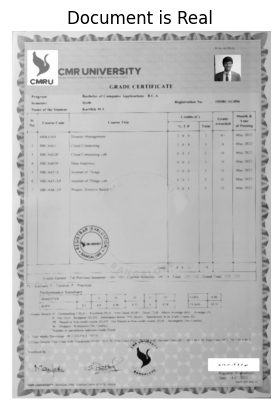

In [67]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Function to display the image with the classification result
def display_result(image, result):
    label = "Real" if result == 1 else "Fake"
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Document is {label}')
    plt.axis('off')
    plt.show()

# Function to classify the document
def classify_document(features):
    # Load the pre-trained model
    model_path = 'model.h5'  # Update the path
    model = load_model(model_path)

    # Predict the result
    features = np.expand_dims(features, axis=0)  # Add batch dimension
    result = model.predict(features)

    # For binary classification, assuming the output is a single probability
    result = (result > 0.5).astype(int)  # Threshold at 0.5
    result = result[0][0]  # Get the scalar result

    return result

# Placeholder for extracted features from the previous steps
# This should be the output from your feature extraction process
# For simplicity, we're using a dummy array
extracted_features = np.random.random((224, 224, 3))  # Update with actual features

# Classify the document
result = classify_document(extracted_features)

# Load and display the preprocessed image
preprocessed_image_path = 'out.jpg'  # Update the path
preprocessed_image = cv2.imread(preprocessed_image_path)

if preprocessed_image is None:
    print(f"Failed to load image at {preprocessed_image_path}")
else:
    # Display the result
    display_result(preprocessed_image, result)
